In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf
import joblib
import seaborn as sns

sns.set()

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [2]:
# load datasets

train_df = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_FaultFree_Training.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_Faulty_Training.csv')

# remove "unnamed" columns

train_df = train_df.iloc[:,1:]
test_df = test_df.iloc[:,1:]

# rename stuff

# rename stuff according to this paper: https://www.sciencedirect.com/science/article/pii/S0098135414000969?via%3Dihub
'''
X_dict = {
'XMEAS_1':'A_feed_stream',
'XMEAS_2':'D_feed_stream',
'XMEAS_3':'E_feed_stream',
'XMEAS_4':'Total_fresh_feed_stripper',
'XMEAS_5':'Recycle_flow_into_rxtr',
'XMEAS_6':'Reactor_feed_rate',
'XMEAS_7':'Reactor_pressure',
'XMEAS_8':'Reactor_level',
'XMEAS_9':'Reactor_temp',
'XMEAS_10':'Purge_rate',
'XMEAS_11':'Separator_temp',
'XMEAS_12':'Separator_level',
'XMEAS_13':'Separator_pressure',
'XMEAS_14':'Separator_underflow',
'XMEAS_15':'Stripper_level',
'XMEAS_16':'Stripper_pressure',
'XMEAS_17':'Stripper_underflow',
'XMEAS_18':'Stripper_temperature',
'XMEAS_19':'Stripper_steam_flow',
'XMEAS_20':'Compressor_work',
'XMEAS_21':'Reactor_cooling_water_outlet_temp',
'XMEAS_22':'Condenser_cooling_water_outlet_temp',
'XMEAS_23':'Composition_of_A_rxtr_feed',
'XMEAS_24':'Composition_of_B_rxtr_feed',
'XMEAS_25':'Composition_of_C_rxtr_feed',
'XMEAS_26':'Composition_of_D_rxtr_feed',
'XMEAS_27':'Composition_of_E_rxtr_feed',
'XMEAS_28':'Composition_of_F_rxtr_feed',
'XMEAS_29':'Composition_of_A_purge',
'XMEAS_30':'Composition_of_B_purge',
'XMEAS_31':'Composition_of_C_purge',
'XMEAS_32':'Composition_of_D_purge',
'XMEAS_33':'Composition_of_E_purge',
'XMEAS_34':'Composition_of_F_purge',
'XMEAS_35':'Composition_of_G_purge',
'XMEAS_36':'Composition_of_H_purge',
'XMEAS_37':'Composition_of_D_product',
'XMEAS_38':'Composition_of_E_product',
'XMEAS_39':'Composition_of_F_product',
'XMEAS_40':'Composition_of_G_product',
'XMEAS_41':'Composition_of_H_product',
'XMV_1':'D_feed_flow_valve',
'XMV_2':'E_feed_flow_valve',
'XMV_3':'A_feed_flow_valve',
'XMV_4':'Total_feed_flow_stripper_valve',
'XMV_5':'Compressor_recycle_valve',
'XMV_6':'Purge_valve',
'XMV_7':'Separator_pot_liquid_flow_valve',
'XMV_8':'Stripper_liquid_product_flow_valve',
'XMV_9':'Stripper_steam_valve',
'XMV_10':'Reactor_cooling_water_flow_valve',
'XMV_11':'Condenser_cooling_water_flow_valve',
'XMV_12':'Agitator_speed'
   }

train_df = train_df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
test_df = test_df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
'''

"\nX_dict = {\n'XMEAS_1':'A_feed_stream',\n'XMEAS_2':'D_feed_stream',\n'XMEAS_3':'E_feed_stream',\n'XMEAS_4':'Total_fresh_feed_stripper',\n'XMEAS_5':'Recycle_flow_into_rxtr',\n'XMEAS_6':'Reactor_feed_rate',\n'XMEAS_7':'Reactor_pressure',\n'XMEAS_8':'Reactor_level',\n'XMEAS_9':'Reactor_temp',\n'XMEAS_10':'Purge_rate',\n'XMEAS_11':'Separator_temp',\n'XMEAS_12':'Separator_level',\n'XMEAS_13':'Separator_pressure',\n'XMEAS_14':'Separator_underflow',\n'XMEAS_15':'Stripper_level',\n'XMEAS_16':'Stripper_pressure',\n'XMEAS_17':'Stripper_underflow',\n'XMEAS_18':'Stripper_temperature',\n'XMEAS_19':'Stripper_steam_flow',\n'XMEAS_20':'Compressor_work',\n'XMEAS_21':'Reactor_cooling_water_outlet_temp',\n'XMEAS_22':'Condenser_cooling_water_outlet_temp',\n'XMEAS_23':'Composition_of_A_rxtr_feed',\n'XMEAS_24':'Composition_of_B_rxtr_feed',\n'XMEAS_25':'Composition_of_C_rxtr_feed',\n'XMEAS_26':'Composition_of_D_rxtr_feed',\n'XMEAS_27':'Composition_of_E_rxtr_feed',\n'XMEAS_28':'Composition_of_F_rxtr_feed',\

In [3]:
X_dict = {
'XMEAS_1':'XMEAS1',
'XMEAS_2':'XMEAS2',
'XMEAS_3':'XMEAS3',
'XMEAS_4':'XMEAS4',
'XMEAS_5':'XMEAS5',
'XMEAS_6':'XMEAS6',
'XMEAS_7':'XMEAS7',
'XMEAS_8':'XMEAS8',
'XMEAS_9':'XMEAS9',
'XMEAS_10':'XMEAS10',
'XMEAS_11':'XMEAS11',
'XMEAS_12':'XMEAS12',
'XMEAS_13':'XMEAS13',
'XMEAS_14':'XMEAS14',
'XMEAS_15':'XMEAS15',
'XMEAS_16':'XMEAS16',
'XMEAS_17':'XMEAS17',
'XMEAS_18':'XMEAS18',
'XMEAS_19':'XMEAS19',
'XMEAS_20':'XMEAS20',
'XMEAS_21':'XMEAS21',
'XMEAS_22':'XMEAS22',
'XMEAS_23':'XMEAS23',
'XMEAS_24':'XMEAS24',
'XMEAS_25':'XMEAS25',
'XMEAS_26':'XMEAS26',
'XMEAS_27':'XMEAS27',
'XMEAS_28':'XMEAS28',
'XMEAS_29':'XMEAS29',
'XMEAS_30':'XMEAS30',
'XMEAS_31':'XMEAS31',
'XMEAS_32':'XMEAS32',
'XMEAS_33':'XMEAS33',
'XMEAS_34':'XMEAS34',
'XMEAS_35':'XMEAS35',
'XMEAS_36':'XMEAS36',
'XMEAS_37':'XMEAS37',
'XMEAS_38':'XMEAS38',
'XMEAS_39':'XMEAS39',
'XMEAS_40':'XMEAS40',
'XMEAS_41':'XMEAS41',
'XMV_1':'XMV1',
'XMV_2':'XMV2',
'XMV_3':'XMV3',
'XMV_4':'XMV4',
'XMV_5':'XMV5',
'XMV_6':'XMV6',
'XMV_7':'XMV7',
'XMV_8':'XMV8',
'XMV_9':'XMV9',
'XMV_10':'XMV10',
'XMV_11':'XMV11',
'XMV_12':'XMV12'
   }

train_df = train_df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
test_df = test_df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)

In [4]:
def series_to_LSTM(dataframe, n_inputs = 1, n_outputs = 1, dropnan = True):
    # check if the input dataframe is a list
    # if it is, consider it a time-series
    # otherwise, take the number of columns
    if type(dataframe) is list:
        n_vars = 1
    else:
        n_vars = dataframe.shape[1]

    df = pd.DataFrame(dataframe)
    cols, names = list(), list() # initialize cols and names

    # generate input sequence
    for i in range(n_inputs, 0, -1): # backwards

        cols.append(df.shift(i)) # lagging dataframe, used for forecasting

        names += [('%d(t-%d)' % (j, i)) for j in range(n_vars)]
            # generates column names for input sequences
            # the names are of format j(t-i)

    # generate forecast sequence
    for i in range(0, n_outputs):

        cols.append(df.shift(-i)) # also a lagging dataframe

        # generate column names for output sequences in the format j(t+i)
        if i == 0:
            names += [('%d(t)' % (j)) for j in range(n_vars)]
        else:
            names += [('%d(t+%d)' % (j, i)) for j in range(n_vars)]

    # now put it all together
    aggregate = pd.concat(cols, axis=1)
    aggregate.columns = names # rename columns

    # discard rows with NaN values
    if dropnan:
        aggregate.dropna(inplace=True)

    return aggregate

In [5]:
scaler = preprocessing.MinMaxScaler()

data_train = train_df[(train_df.faultNumber == 0) & (train_df.simulationRun.isin(range(200)))]
data_train = data_train.iloc[:,3:]
data_train = scaler.fit_transform(data_train)


In [6]:
data_test = train_df[(train_df.faultNumber == 0) & (train_df.simulationRun.isin(range(400, 500)))]
data_test = data_test.iloc[:,3:]
data_test = scaler.fit_transform(data_test)

In [7]:
print(data_train.shape)
print(data_test.shape)

(99500, 52)
(50000, 52)


In [8]:
time_steps = 10

ref_train = series_to_LSTM(data_train, time_steps, 1)
ref_test = series_to_LSTM(data_test, time_steps, 1)

In [ ]:
print(ref_train.shape)
print(ref_test.shape)

(99490, 572)
(49990, 572)


In [9]:
train_x = ref_train.values[:, :-52] # select all columns except the last 52
train_y = ref_train.values[:, -52:] # select only the last 52 columns

train_x = train_x.reshape(train_x.shape[0], time_steps, train_x.shape[1] // time_steps)
# Reshapes the train_x array to have a shape of (num_samples, time_steps, features_per_time_step), just like LSTM expects

test_x = ref_test.values[:,:-52]
test_y = ref_test.values[:,-52:]
test_x = test_x.reshape(test_x.shape[0],time_steps,test_x.shape[1]//time_steps)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(99490, 10, 52)
(99490, 52)
(49990, 10, 52)
(49990, 52)


In [10]:
# build the neural network

model_LSTM = Sequential()
model_LSTM.add(LSTM(50, input_shape=(train_x.shape[1], train_x.shape[2])))
model_LSTM.add(Dense(train_x.shape[-1]))
model_LSTM.compile(loss = 'mse', optimizer = 'adam')

In [ ]:
# fit the model

with tf.device('/gpu:0'):
    history = model_LSTM.fit(train_x, train_y, epochs=25, validation_data=(test_x, test_y), verbose=2, shuffle=False)


Epoch 1/25
3110/3110 - 20s - loss: 0.0116 - val_loss: 0.0099 - 20s/epoch - 7ms/step
Epoch 2/25
3110/3110 - 15s - loss: 0.0082 - val_loss: 0.0083 - 15s/epoch - 5ms/step
Epoch 3/25
3110/3110 - 17s - loss: 0.0072 - val_loss: 0.0077 - 17s/epoch - 5ms/step
Epoch 4/25
3110/3110 - 17s - loss: 0.0069 - val_loss: 0.0075 - 17s/epoch - 5ms/step
Epoch 5/25
3110/3110 - 15s - loss: 0.0068 - val_loss: 0.0074 - 15s/epoch - 5ms/step
Epoch 6/25
3110/3110 - 17s - loss: 0.0067 - val_loss: 0.0074 - 17s/epoch - 5ms/step
Epoch 7/25
3110/3110 - 15s - loss: 0.0067 - val_loss: 0.0074 - 15s/epoch - 5ms/step
Epoch 8/25
3110/3110 - 16s - loss: 0.0067 - val_loss: 0.0074 - 16s/epoch - 5ms/step
Epoch 9/25
3110/3110 - 15s - loss: 0.0067 - val_loss: 0.0074 - 15s/epoch - 5ms/step
Epoch 10/25
3110/3110 - 17s - loss: 0.0066 - val_loss: 0.0073 - 17s/epoch - 5ms/step
Epoch 11/25
3110/3110 - 15s - loss: 0.0066 - val_loss: 0.0073 - 15s/epoch - 5ms/step
Epoch 12/25
3110/3110 - 15s - loss: 0.0066 - val_loss: 0.0073 - 15s/epoch 

In [ ]:
joblib.dump(history, '/content/drive/MyDrive/Thesis/LSTM/LSTM_fit.joblib')

['/content/drive/MyDrive/Thesis/LSTM/LSTM_fit.joblib']

In [11]:
LSTM_fit = joblib.load('/content/drive/MyDrive/Thesis/LSTM/LSTM_fit.joblib')

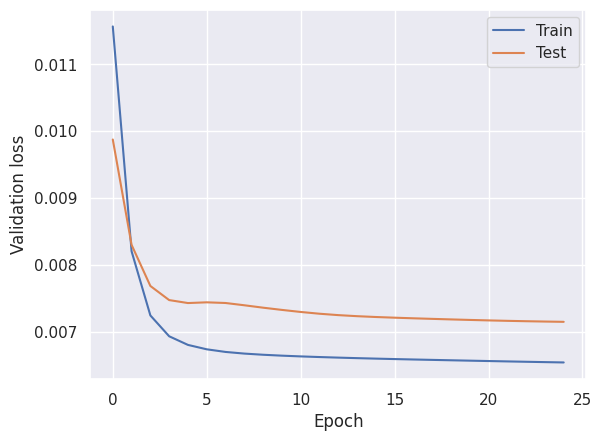

In [12]:
plt.plot(LSTM_fit.history['loss'], label='Train')
plt.plot(LSTM_fit.history['val_loss'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

16/16 [==============================] - 3s 6ms/step


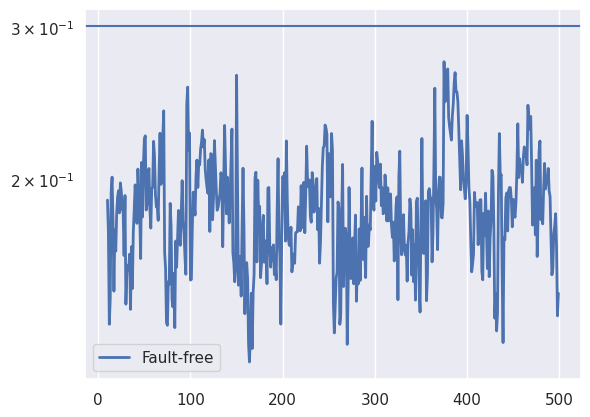

In [13]:
testSample_faultFree = train_df[train_df.simulationRun==200].iloc[:,3:]
testSample_faultFree = scaler.transform(testSample_faultFree)
testSample_faultFree = series_to_LSTM(testSample_faultFree, time_steps, 1)

test_x = testSample_faultFree.iloc[:,:-52]
test_y = testSample_faultFree.iloc[:,-52:]
test_x = test_x.values.reshape(test_x.shape[0], time_steps, test_x.shape[1]//time_steps)

predictions = model_LSTM.predict(test_x)

#plt.axvline(x=20,color='black', linewidth=0.75, linestyle='--')

MSE_testSample_faultFree = np.square((test_y.iloc[:,:]-predictions[:,:])**2).mean(axis=1)

plt.yscale('log')
plt.plot(MSE_testSample_faultFree, label='Fault-free', linewidth=2) # mean squared error
plt.legend()

mse_threshold = np.max(MSE_testSample_faultFree)*1.1
plt.axhline(mse_threshold)

In [14]:
mse_threshold

0.3010042598566419

In [17]:
false_df = train_df[(train_df.simulationRun.isin(range(46, 50))) & (train_df.faultNumber==0)].iloc[:,3:]
fasle_df = scaler.transform(false_df)
false_df = series_to_LSTM(false_df,time_steps,1)

test_x = false_df.iloc[:,:-52]
test_y = false_df.iloc[:,-52:]
test_x = test_x.values.reshape(test_x.shape[0],time_steps,test_x.shape[1]//time_steps)

predictions = model_LSTM.predict(test_x)
mse = np.square((test_y.iloc[:,:]-predictions[:,:])**2).mean(axis=1)
mse

63/63 [==============================] - 0s 3ms/step


22510    1.593958e+13
22511    1.526481e+13
22512    1.492308e+13
22513    1.490951e+13
22514    1.551230e+13
             ...     
24495    1.491645e+13
24496    1.543161e+13
24497    1.544071e+13
24498    1.497323e+13
24499    1.488645e+13
Length: 1990, dtype: float64

16/16 [==============================] - 0s 4ms/step


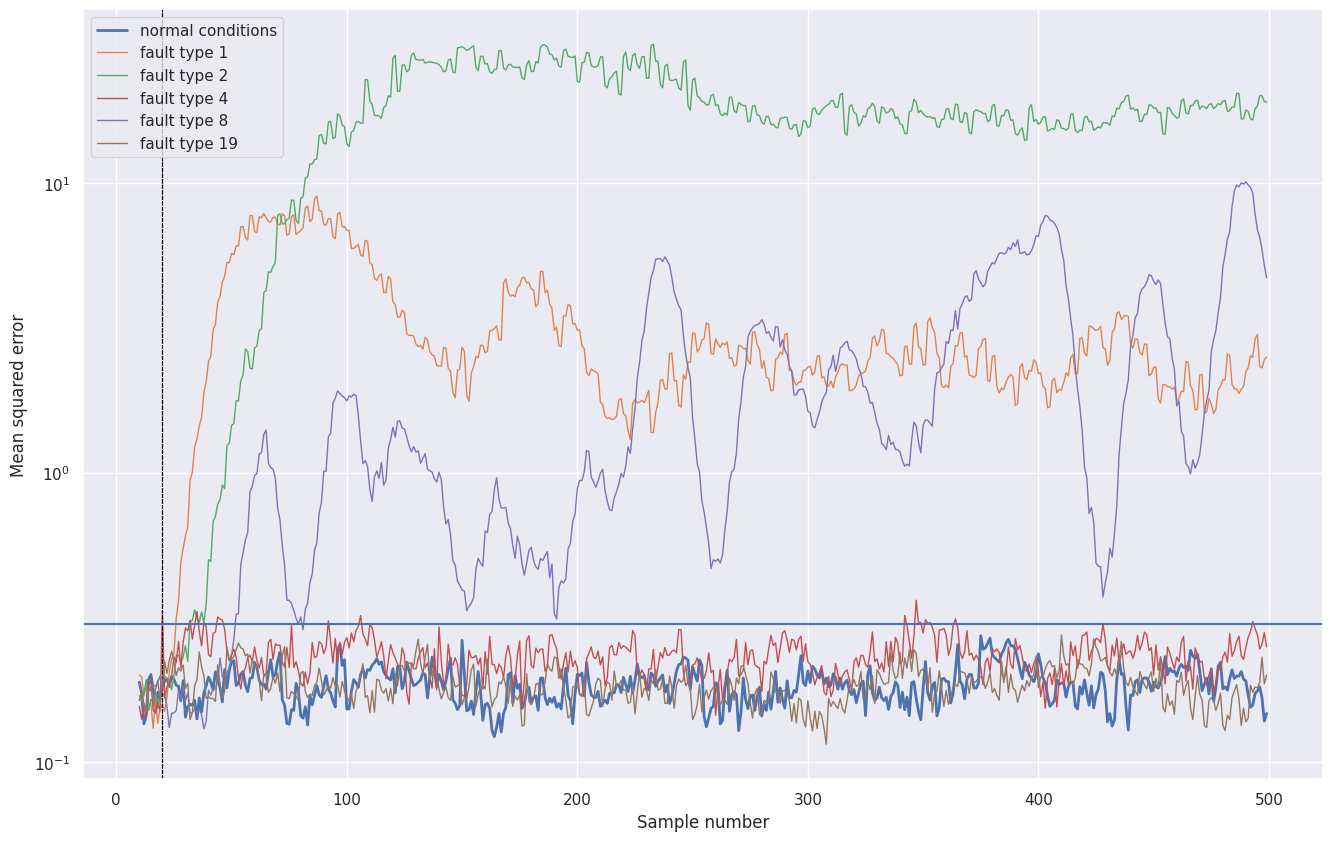

In [ ]:
plt.figure(figsize=(16,10))
plt.yscale('log')

for i in [0,1,2,4,8,19]:
    if i == 0:
        test_sample = train_df[(train_df.simulationRun==200) & (train_df.faultNumber==i)].iloc[:,3:]
        lwt = 2 # lineweight
        order = 1 # plotting order
    else:
        test_sample = test_df[(test_df.simulationRun==np.random.randint(200)) & (test_df.faultNumber==i)].iloc[:,3:]
        lwt = 1
        order = 2

    test_sample = scaler.transform(test_sample)
    test_sample = series_to_LSTM(test_sample,time_steps,1)

    test_x = test_sample.iloc[:,:-52]
    test_y = test_sample.iloc[:,-52:]
    test_x = test_x.values.reshape(test_x.shape[0],time_steps,test_x.shape[1]//time_steps)

    predictions = model_LSTM.predict(test_x)

    plt.axvline(x=20,color='black', linewidth=0.75, linestyle='--')
    if i==0:
        label='normal conditions'
    else:
        label='fault type %d' % i
    plt.plot(np.square((test_y.iloc[:,:]-predictions[:,:])**2).mean(axis=1), label=label, linewidth=lwt, zorder=order) # mean squared error
    plt.legend()

plt.axhline(mse_threshold)

plt.xlabel('Sample number')
plt.ylabel('Mean squared error')
plt.show()

16/16 [==============================] - 0s 3ms/step


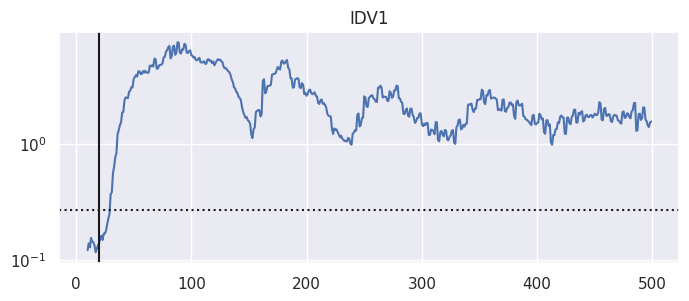

16/16 [==============================] - 0s 3ms/step


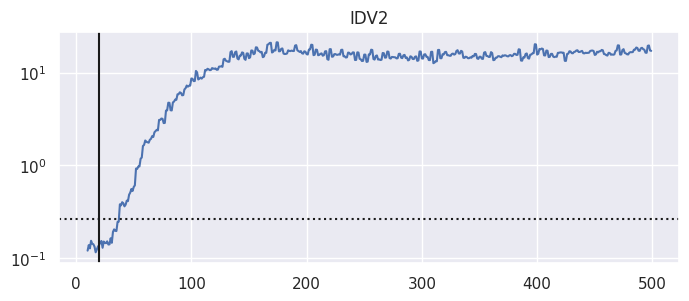

16/16 [==============================] - 0s 4ms/step


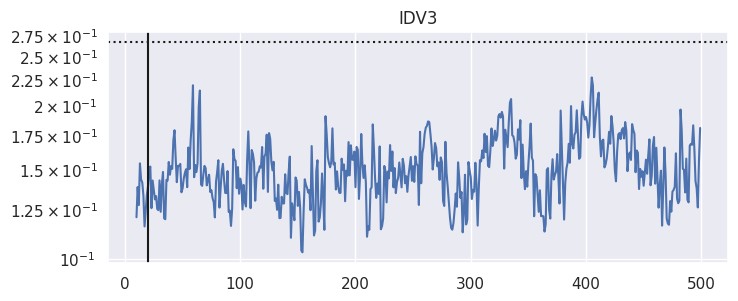

16/16 [==============================] - 0s 5ms/step


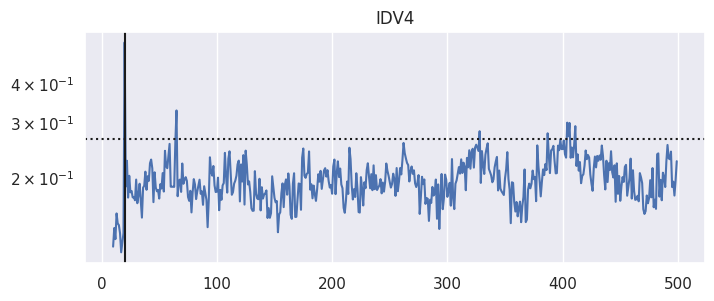

16/16 [==============================] - 0s 3ms/step


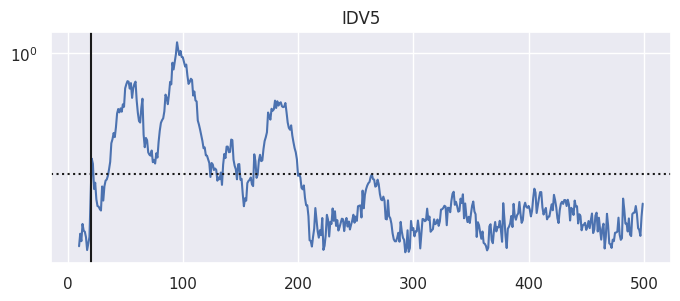

16/16 [==============================] - 0s 6ms/step


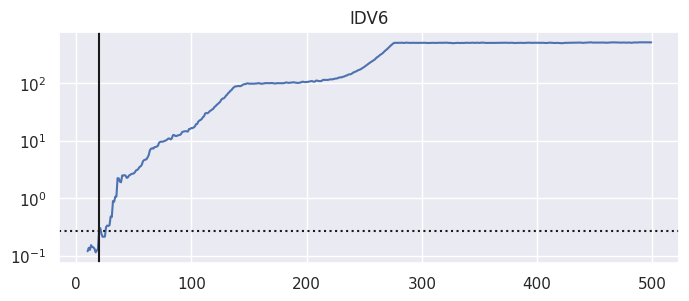

16/16 [==============================] - 0s 8ms/step


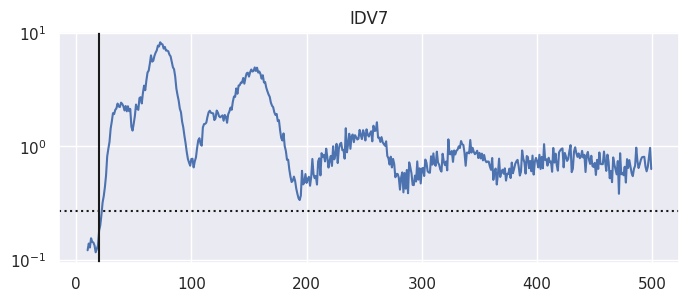

16/16 [==============================] - 0s 4ms/step


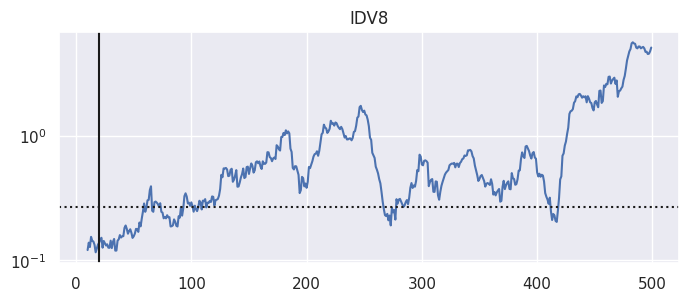

16/16 [==============================] - 0s 6ms/step


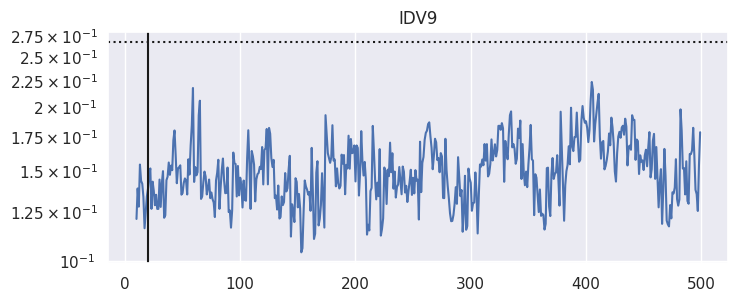

16/16 [==============================] - 0s 5ms/step


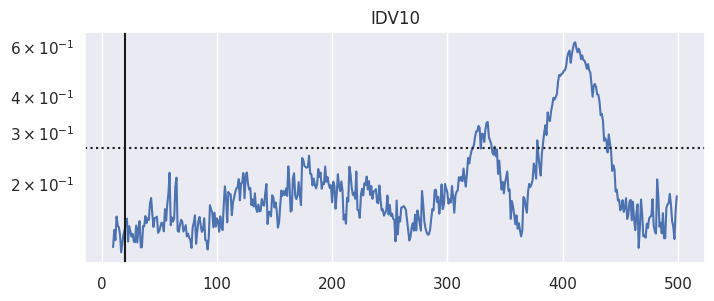

16/16 [==============================] - 0s 5ms/step


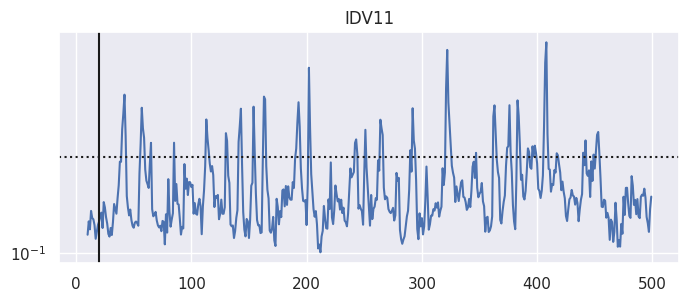

16/16 [==============================] - 0s 4ms/step


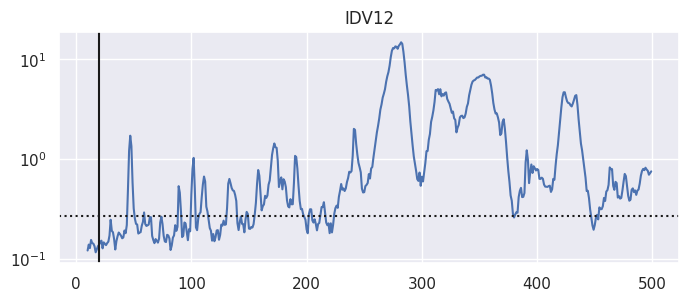

16/16 [==============================] - 0s 4ms/step


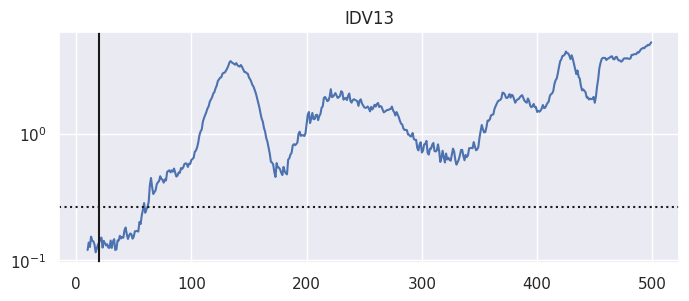

16/16 [==============================] - 0s 4ms/step


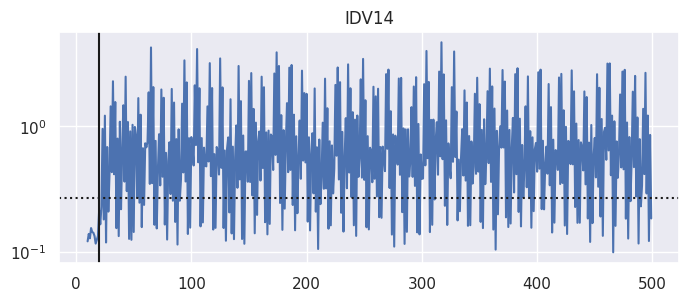

16/16 [==============================] - 0s 5ms/step


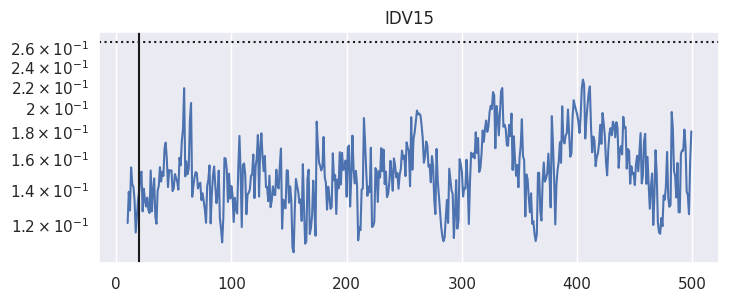

16/16 [==============================] - 0s 3ms/step


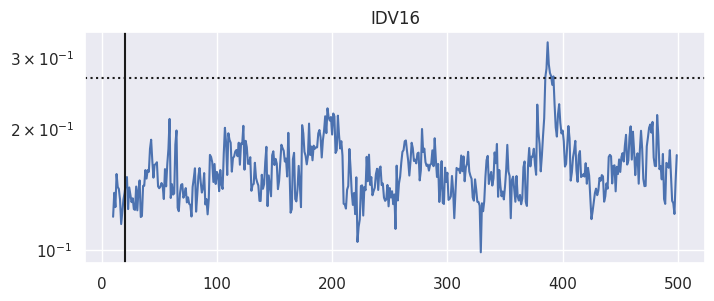

16/16 [==============================] - 0s 3ms/step


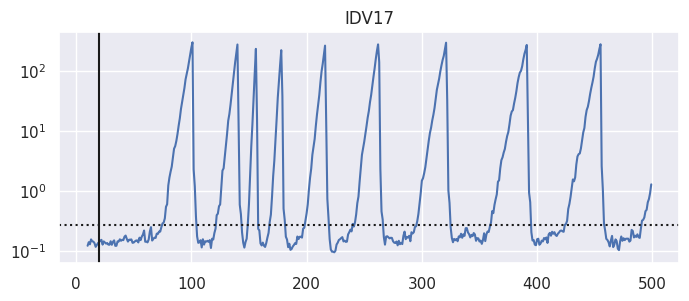

16/16 [==============================] - 0s 4ms/step


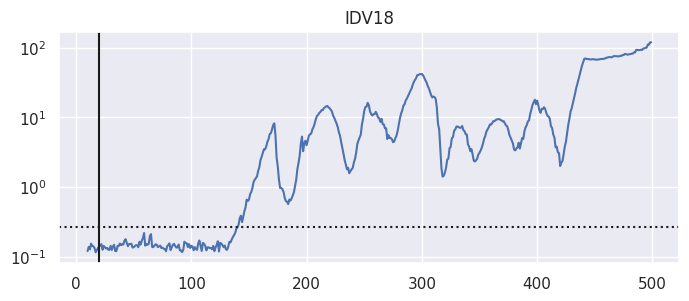

16/16 [==============================] - 0s 3ms/step


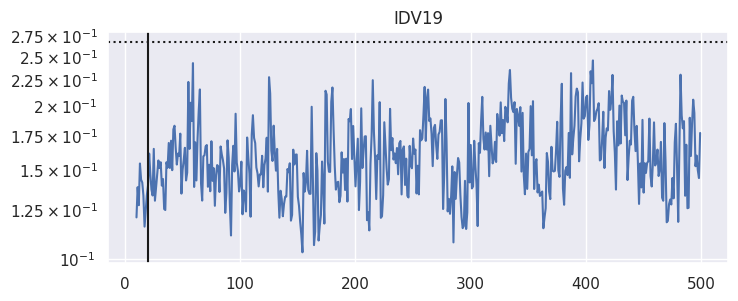

16/16 [==============================] - 0s 2ms/step


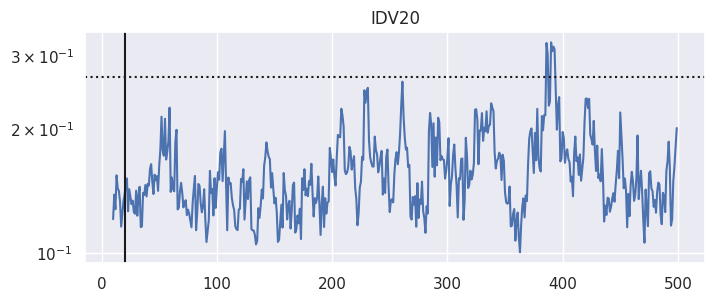

In [ ]:
for fault in range(1,21):

    testSample_faulty = test_df[(test_df.faultNumber==fault) & (test_df.simulationRun==1)].iloc[:,3:]

    testSample_faulty = scaler.transform(testSample_faulty)
    testSample_faulty = series_to_LSTM(testSample_faulty, time_steps,1)

    test_x = testSample_faulty.iloc[:,:-52]
    test_y = testSample_faulty.iloc[:,-52:]
    test_x = test_x.values.reshape(test_x.shape[0],time_steps,test_x.shape[1]//time_steps)

    predictions = model_LSTM.predict(test_x)

    MSE_testSample_faulty = np.square((test_y.iloc[:,:]-predictions[:,:])**2).mean(axis=1)

    plt.figure(figsize=(8,3))
    #plt.rcParams['figure.figsize'] = [8,4]
    plt.plot(MSE_testSample_faulty)
    plt.axhline(mse_threshold, c='k', ls='dotted')
    plt.axvline(20, c='k')
    plt.title(f'IDV{fault}')

    plt.yscale('log')
    plt.show()


In [ ]:
def combined_result(X, threshold):

    result = X > threshold
        # creates a boolean array

    result_float = [float(val) for val in result]
        # converts boolean to float

    return (sum(result_float)/len(result))*100

In [ ]:
# DEBUG #


fault_counts = {}
    # initialize empty dictionary

for fault in range(1,21):

    data_temp = test_df[(test_df.faultNumber==fault) & (test_df.simulationRun==1)].iloc[:,3:]


    test_sample = scaler.transform(data_temp)
    test_sample = series_to_LSTM(test_sample,time_steps,1)

    test_x = test_sample.iloc[:,:-52]
    test_y = test_sample.iloc[:,-52:]
    test_x = test_x.values.reshape(test_x.shape[0],time_steps,test_x.shape[1]//time_steps)

    predictions = model_LSTM.predict(test_x)
    MSE_testSample_faulty = np.square((test_y.iloc[:,:]-predictions[:,:])**2).mean(axis=1)

    counts = combined_result(MSE_testSample_faulty, mse_threshold)
    fault_counts['IDV{}'.format(fault)] = counts


16/16 [==============================] - 0s 2ms/step


In [ ]:
fault_counts

{'IDV1': 95.91836734693877,
 'IDV2': 95.51020408163265,
 'IDV3': 0.0,
 'IDV4': 0.8163265306122449,
 'IDV5': 26.73469387755102,
 'IDV6': 96.53061224489797,
 'IDV7': 83.46938775510205,
 'IDV8': 73.26530612244898,
 'IDV9': 0.0,
 'IDV10': 11.224489795918368,
 'IDV11': 6.122448979591836,
 'IDV12': 66.93877551020408,
 'IDV13': 88.9795918367347,
 'IDV14': 76.53061224489795,
 'IDV15': 0.0,
 'IDV16': 0.6122448979591837,
 'IDV17': 49.795918367346935,
 'IDV18': 73.87755102040816,
 'IDV19': 0.20408163265306123,
 'IDV20': 2.0408163265306123}

In [ ]:
fdr_df = pd.DataFrame.from_dict(fault_counts, orient='index')
fdr_df.columns = ['lstm']
fdr_df = fdr_df.round(1)
fdr_df

,lstm
IDV1,95.9
IDV2,95.5
IDV3,0.0
IDV4,0.8
IDV5,26.7
IDV6,96.5
IDV7,83.5
IDV8,73.3
IDV9,0.0
IDV10,11.2


In [ ]:
csv_file_path = '/content/drive/MyDrive/Thesis/comparison/lstm.csv'
fdr_df.to_csv(csv_file_path, index=False)